<a href="https://colab.research.google.com/github/RFJC21/FB_Prophet_Forecasting/blob/master/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install --upgrade git+https://github.com/jroakes/google-analytics.git
  !pip install fbprophet
except:
  pass
finally:
  clear_output()
  print('All Loaded')

All Loaded


In [0]:
import pandas as pd
from fbprophet import Prophet
from statsmodels.tools.eval_measures import mse, rmse,meanabs
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot

In [0]:
from google.colab import files
uploaded = files.upload()

Saving BeerWineLiquor.csv to BeerWineLiquor (2).csv


In [0]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['BeerWineLiquor.csv']))
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


# By defaul, this model expects daily data!!

# Rename columns always! e data time object

In [0]:
df.columns=['ds','y']
df

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
...,...,...
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130


In [0]:
df['ds']=pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


# Create Model (using full data)

In [0]:
# fit entire dataset
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecast

In [0]:
#placehoer to future predictions
future=model.make_future_dataframe(periods=24,freq='MS')
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [0]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


# Predict

In [0]:
forecast=model.predict(future)

In [0]:
#yhat sao as Predictions
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1765.609137,1144.914323,1467.714079,1765.609137,1765.609137,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,-461.433071,0.0,0.0,0.0,1304.176066
1,1992-02-01,1768.666905,1179.616368,1504.751444,1768.666905,1768.666905,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,-426.696951,0.0,0.0,0.0,1341.969954
2,1992-03-01,1771.527398,1422.414369,1750.532324,1771.527398,1771.527398,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,-178.651299,0.0,0.0,0.0,1592.876098
3,1992-04-01,1774.585166,1422.177780,1740.654379,1774.585166,1774.585166,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,-196.147147,0.0,0.0,0.0,1578.438018
4,1992-05-01,1777.544296,1666.978624,1978.491636,1777.544296,1777.544296,44.823220,44.823220,44.823220,44.823220,44.823220,44.823220,0.0,0.0,0.0,1822.367516


In [0]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [0]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4464.342540,4782.386614,4629.426372
337,2020-02-01,4515.296114,4834.204538,4680.226146
338,2020-03-01,4778.037558,5113.366820,4943.299086
339,2020-04-01,4773.257227,5115.731212,4941.866893
340,2020-05-01,5032.466494,5352.969900,5198.382732
341,2020-06-01,5019.127583,5343.511372,5178.976562
342,2020-07-01,5163.544855,5481.872671,5311.178497
343,2020-08-01,5078.046882,5400.827327,5240.705951
344,2020-09-01,4925.970088,5238.594943,5083.568322
345,2020-10-01,5028.256775,5353.149581,5189.273100


# Plot

In [0]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

(735234.0, 737791.0)

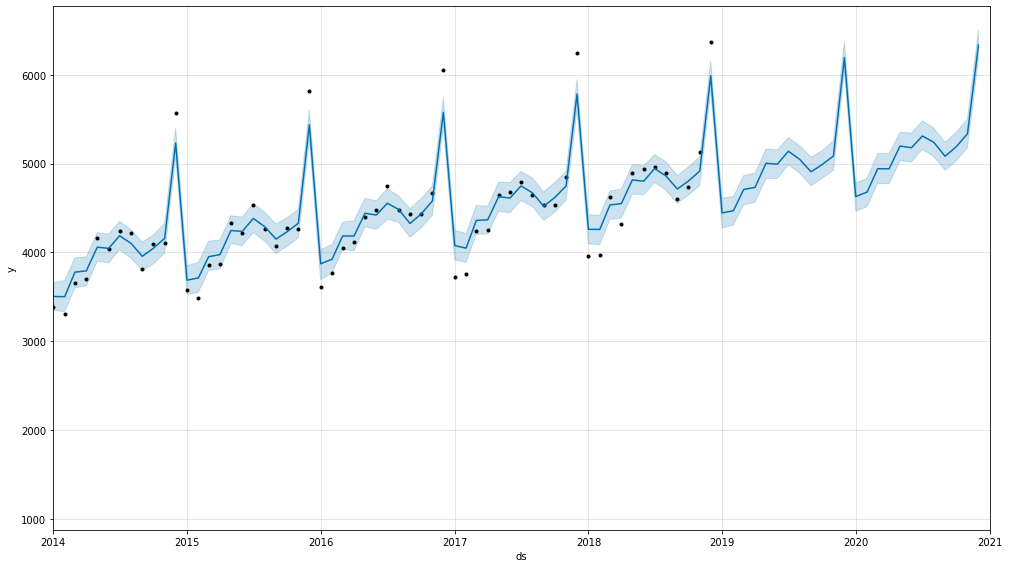

In [0]:
model.plot(forecast,figsize=(14,8));
plt.xlim('2014-01-01','2021-01-01')

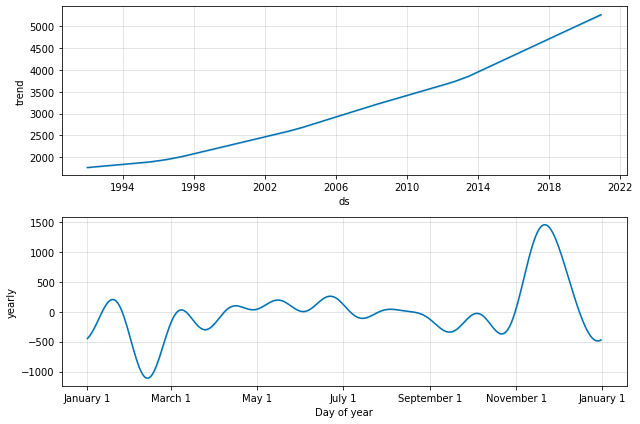

In [0]:
model.plot_components(forecast);

# Second Example

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Miles_Traveled.csv to Miles_Traveled (1).csv


In [0]:
df1 = pd.read_csv(io.BytesIO(uploaded['Miles_Traveled.csv']))
df1.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [0]:
df1.columns=['ds','y']
df1

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0
...,...,...
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0


In [0]:
df1['ds']=pd.to_datetime(df1['ds'])
df1.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


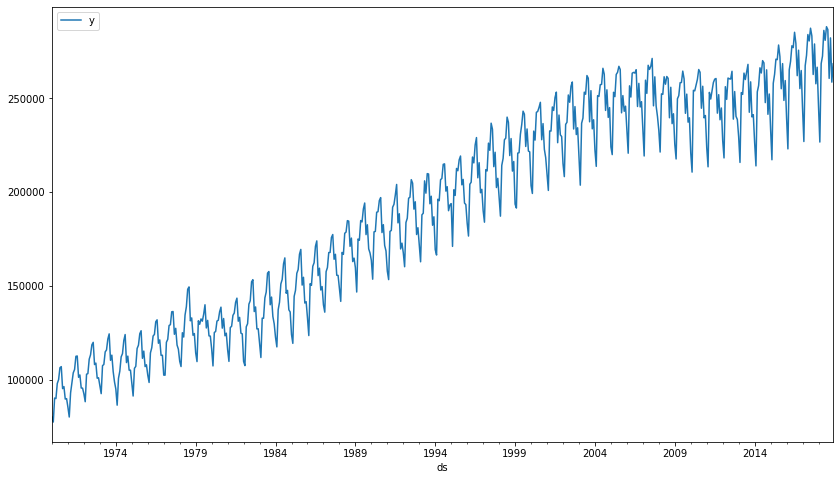

In [0]:
df1.plot(x='ds',y='y',figsize=(14,8))

# Splt Data

In [0]:
len(df1)

588

In [0]:
train=df1.iloc[:576]
test=df1.iloc[576:]

# Create Model

In [0]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=12,freq='MS')
forecast=m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263410.800604,273638.227161,285621.971073,263319.743404,263432.938298,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,0.0,0.0,0.0,279858.813654
584,2018-09-01,263552.915940,256407.284401,267523.483341,263421.366589,263601.372537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,0.0,0.0,0.0,261882.497404
585,2018-10-01,263690.446911,263215.889447,274756.520773,263514.330445,263762.505127,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,0.0,0.0,0.0,268995.952784
586,2018-11-01,263832.562247,249800.823213,261460.498069,263618.481383,263949.052578,-8208.986942,-8208.986942,-8208.986942,-8208.986942,-8208.986942,-8208.986942,0.0,0.0,0.0,255623.575305
587,2018-12-01,263970.093217,250746.165240,262572.962794,263707.680761,264120.948682,-6922.716937,-6922.716937,-6922.716937,-6922.716937,-6922.716937,-6922.716937,0.0,0.0,0.0,257047.376280


# Plot Predict vs test

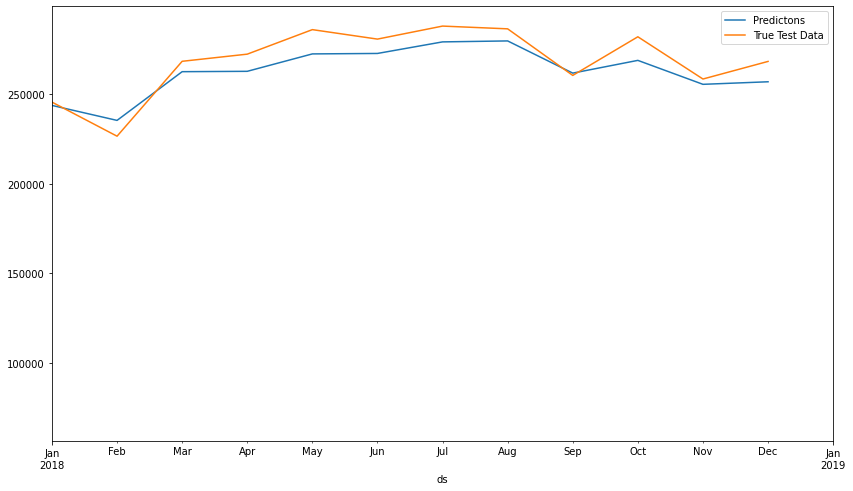

In [0]:
ax=forecast.plot(x='ds',y='yhat',label='Predictons', legend=True,figsize=(14,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True, ax=ax,xlim=('2018-01-01','2019-01-01'))

# Evaluate

In [0]:
from statsmodels.tools.eval_measures import mse, rmse,meanabs

In [0]:
predictions=forecast.iloc[-12:]['yhat']
predictions

576    243850.453937
577    235480.588794
578    262683.274392
579    262886.236399
580    272609.522601
581    272862.615300
582    279321.841101
583    279858.813654
584    261882.497404
585    268995.952784
586    255623.575305
587    257047.376280
Name: yhat, dtype: float64

In [0]:
error=rmse(predictions,test['y'])
error

8618.783155559411

In [0]:
test.mean()

y    268739.666667
dtype: float64

# Evaluate with Prophet

In [0]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [0]:
#initial (5 years)
initial=5*365
initial=str(initial)+'days'

#period (5 years)
period=5*365
period=str(period)+'days'

#horizon (forecast 1 year ahead)
horizon=365
horizon=str(horizon)+'days'

In [0]:
df_cv=cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [0]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087306,106989.498768,109996.112699,102445.0,1976-12-11
1,1977-02-01,102996.111502,101466.349905,104482.819900,102416.0,1976-12-11
2,1977-03-01,118973.317944,117594.481952,120484.380322,119960.0,1976-12-11
3,1977-04-01,120612.923539,119187.405732,122081.583283,121513.0,1976-12-11
4,1977-05-01,127883.031663,126352.533593,129275.852160,128884.0,1976-12-11


In [0]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.402227e+07,4901.251892,4506.384371,0.027631,0.023593,0.4
1,53 days,2.150811e+07,4637.683407,4238.662732,0.024863,0.023593,0.4
2,54 days,1.807689e+07,4251.692535,3708.943275,0.019933,0.022278,0.5
3,55 days,2.298205e+07,4793.960154,4236.275244,0.023042,0.023593,0.4
4,57 days,2.078937e+07,4559.535784,3972.087270,0.021317,0.022278,0.5
...,...,...,...,...,...,...,...
94,360 days,1.814608e+07,4259.821515,3750.359483,0.019596,0.019565,0.5
95,361 days,1.726110e+07,4154.647536,3473.037339,0.018212,0.018957,0.5
96,362 days,3.173990e+07,5633.817508,4404.300729,0.022034,0.024793,0.4
97,364 days,2.986513e+07,5464.900040,4229.869860,0.021378,0.021629,0.5


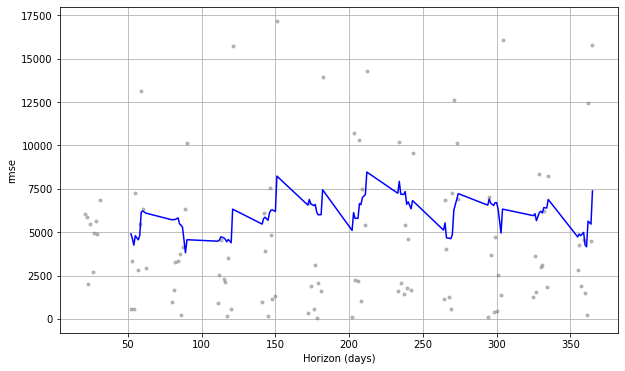

In [0]:
plot_cross_validation_metric(df_cv,metric='rmse');

# Retrain entire dataset

In [0]:
# fit entire dataset
model=Prophet()
model.fit(df1)
#placehoer to future predictions
future=model.make_future_dataframe(periods=12,freq='MS')
forecast=model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

# Plot Forecast

(200000.0, 300000.0)

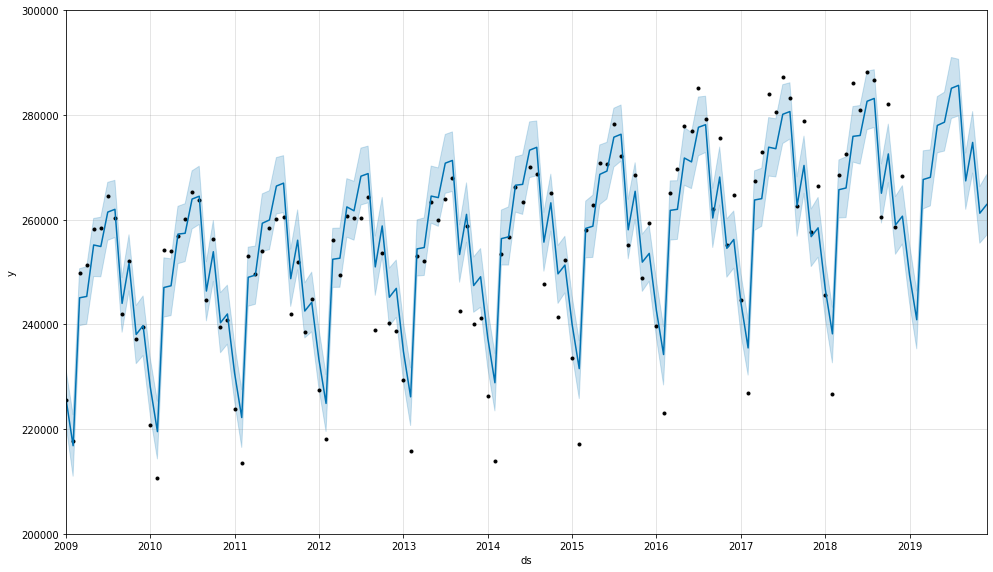

In [0]:
model.plot(forecast,figsize=(14,8));
plt.xlim('2009-01-01','2019-12-01')
plt.ylim(200000,300000)

# Trend with Phophet

In [0]:
from fbprophet.plot import add_changepoints_to_plot

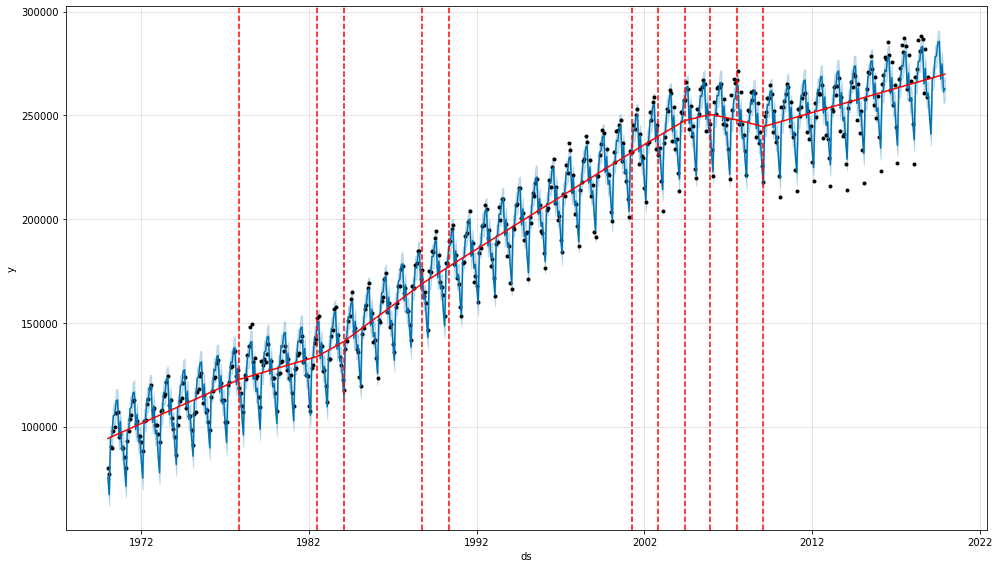

In [0]:
fig=model.plot(forecast,figsize=(14,8))
a=add_changepoints_to_plot(fig.gca(),model,forecast)

# Seasonality with Prophet

In [0]:
#lets create a multiplicative model (instead of the default additive)
# we sould split data and see rmse...

In [0]:
# fit entire dataset
model_2=Prophet(seasonality_mode='multiplicative')
model_2.fit(df1)
#placehoer to future predictions
future=model_2.make_future_dataframe(periods=12,freq='MS')
forecast=model_2.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(733408.0, 737394.0)

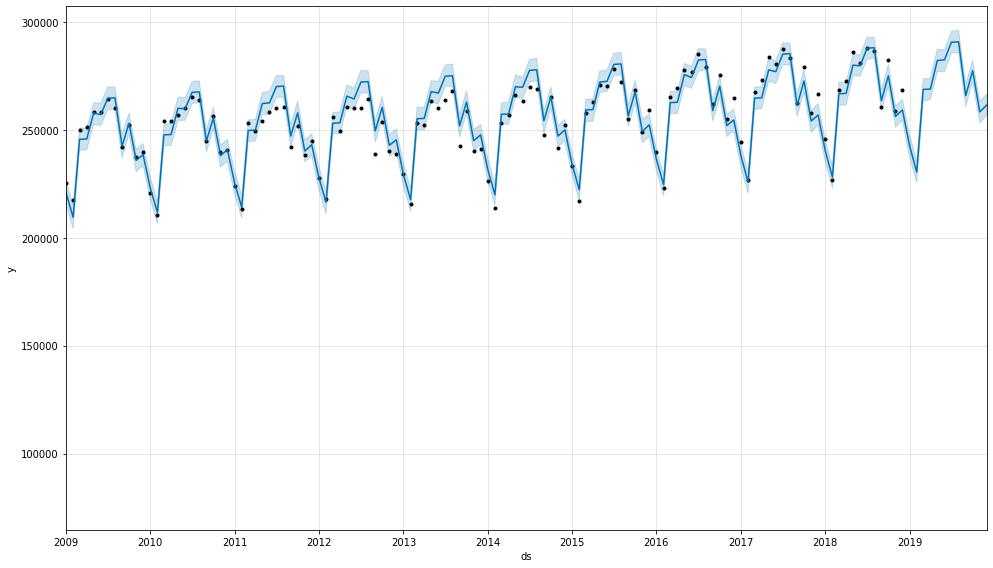

In [0]:
model_2.plot(forecast,figsize=(14,8));
plt.xlim('2009-01-01','2019-12-01')
#plt.ylim(200000,300000)